# Importing the libraries

In [30]:
# importing the all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_curve,roc_auc_score

# Loading the Dataset

In [31]:
trd=pd.read_csv("Titanic_train.csv")
tsd=pd.read_csv('Titanic_test.csv')

In [32]:
print(trd.shape)
tsd.shape

(891, 12)


(418, 11)

In [33]:
# checking the datatypes
trd.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [34]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
# Summary statistics of the data
trd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
# checking the null values in training data
null=trd.isnull().sum()
print(null)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [37]:
# checking the null values in testing data
null1=tsd.isnull().sum()
print(null1)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [38]:
# percentage of null values in training data
null.apply(lambda x:x/trd.shape[0])*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [39]:
# percentage of null values in testing data
null1.apply(lambda x:x/tsd.shape[0])


,0
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.205742
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.002392
Cabin,0.782297


# Handiling missing Values in both Training and testing data

In [40]:
# filing the missing values with median of the column
# filling the null values in Age column of training data
trd['Age']=trd['Age'].fillna(trd["Age"].median())
# filling the null values in Embarked column
trd['Embarked']=trd['Embarked'].fillna(trd['Embarked'].mode()[0])


In [41]:
# converting float datatype to int column
trd['Age']=trd['Age'].astype('int64')

In [42]:
# filing the missing values of age column in testing data
tsd['Age']=tsd['Age'].fillna(tsd['Age'].median())
tsd["Fare"]=tsd["Fare"].fillna(tsd['Fare'].median())

In [43]:
# converting float datatype to int column
tsd['Age']=tsd['Age'].astype('int64')

# Droping the Columns in both training and testing data

In [44]:
# usually we drop the columns which contains null values more than 50 percentage.
# here name column is not required for the training columns
# here ticket column contains the combination of both characters and numbers
# usually the one hot and label encoding techniques create more columns for each unique value
#that's why we drop it.
trd.drop(["Name",'Cabin','Ticket'],axis=1,inplace=True)
trd.head()
tsd.drop(['Name',"Cabin",'Ticket'],axis=1,inplace=True)
tsd.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34,0,0,7.8292,Q
1,893,3,female,47,1,0,7.0000,S
2,894,2,male,62,0,0,9.6875,Q
3,895,3,male,27,0,0,8.6625,S
4,896,3,female,22,1,1,12.2875,S


In [45]:
trd.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S


In [46]:
trd['Sex'].value_counts()
trd['Embarked'].value_counts()
trd.Pclass.unique()

array([3, 1, 2])

# Visualization Part

<Axes: >

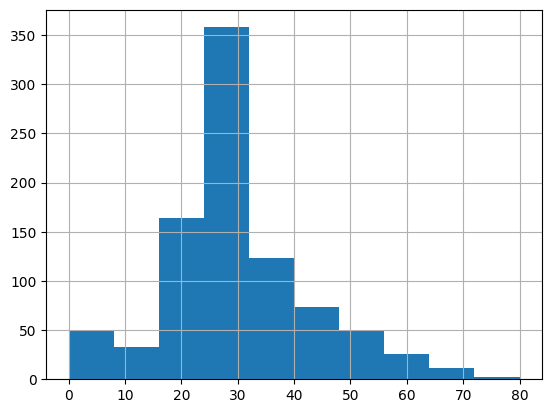

In [47]:
# histogram for age column
trd['Age'].hist()

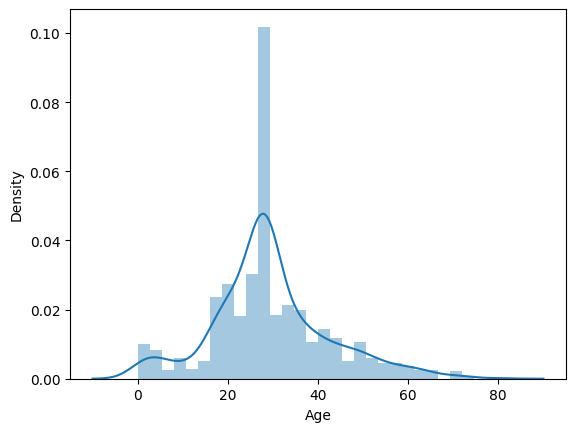

In [48]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(trd["Age"])
plt.show()

In [49]:
# here data is positively skewed and extreme values are present
trd['Age'].skew()

np.float64(0.5035697085944845)

np.float64(4.787316519674893)

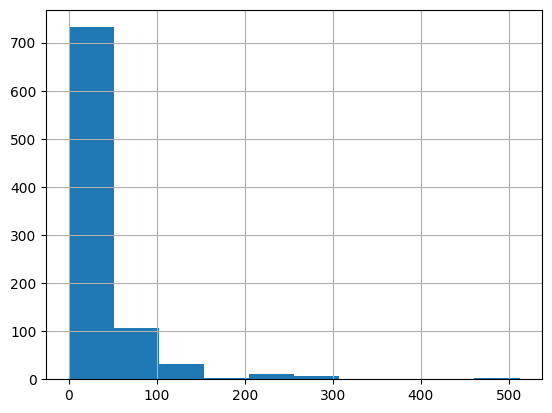

In [50]:
# plotting histogram for the Fare column
trd['Fare'].hist()
trd['Fare'].skew()

# Boxplot

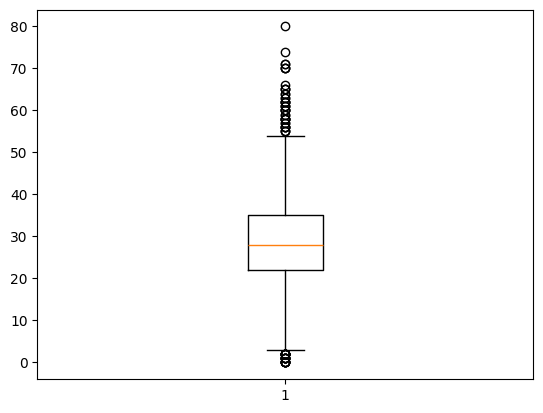

[array([ 2,  2,  0,  2,  1,  1,  1,  2,  2,  0,  2,  1,  1,  0,  2,  2,  2,
         0,  0,  1,  0,  2,  1,  0, 58, 55, 66, 65, 59, 71, 70, 55, 61, 56,
        58, 59, 62, 58, 63, 65, 61, 60, 64, 65, 56, 63, 58, 55, 71, 64, 62,
        62, 60, 61, 57, 80, 56, 58, 70, 60, 60, 70, 57, 62, 74, 56])]

In [51]:
# Both columns have the high extreme Values
box_A=plt.boxplot("Age",data=trd)
plt.show()
list=[]
for x in box_A['fliers']:
  list.append(x.get_ydata())
list

In [52]:
#treating the outliers of 0 Age numbers
# i think,apart from 0 all are the geniune outliers
for x in box_A['caps']:
  print(x.get_ydata()[0])

3
54


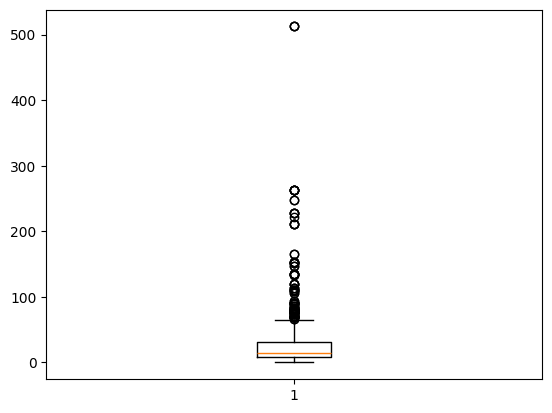

[array([ 71.2833, 263.    , 146.5208,  82.1708,  76.7292,  80.    ,
         83.475 ,  73.5   , 263.    ,  77.2875, 247.5208,  73.5   ,
         77.2875,  79.2   ,  66.6   ,  69.55  ,  69.55  , 146.5208,
         69.55  , 113.275 ,  76.2917,  90.    ,  83.475 ,  90.    ,
         79.2   ,  86.5   , 512.3292,  79.65  , 153.4625, 135.6333,
         77.9583,  78.85  ,  91.0792, 151.55  , 247.5208, 151.55  ,
        110.8833, 108.9   ,  83.1583, 262.375 , 164.8667, 134.5   ,
         69.55  , 135.6333, 153.4625, 133.65  ,  66.6   , 134.5   ,
        263.    ,  75.25  ,  69.3   , 135.6333,  82.1708, 211.5   ,
        227.525 ,  73.5   , 120.    , 113.275 ,  90.    , 120.    ,
        263.    ,  81.8583,  89.1042,  91.0792,  90.    ,  78.2667,
        151.55  ,  86.5   , 108.9   ,  93.5   , 221.7792, 106.425 ,
         71.    , 106.425 , 110.8833, 227.525 ,  79.65  , 110.8833,
         79.65  ,  79.2   ,  78.2667, 153.4625,  77.9583,  69.3   ,
         76.7292,  73.5   , 113.275 , 133.65  , 

In [53]:
# boxplot for the fare column
box_F=plt.boxplot(trd['Fare'])
plt.show()
list=[]
for x in box_F['fliers']:
  list.append(x.get_ydata())
list

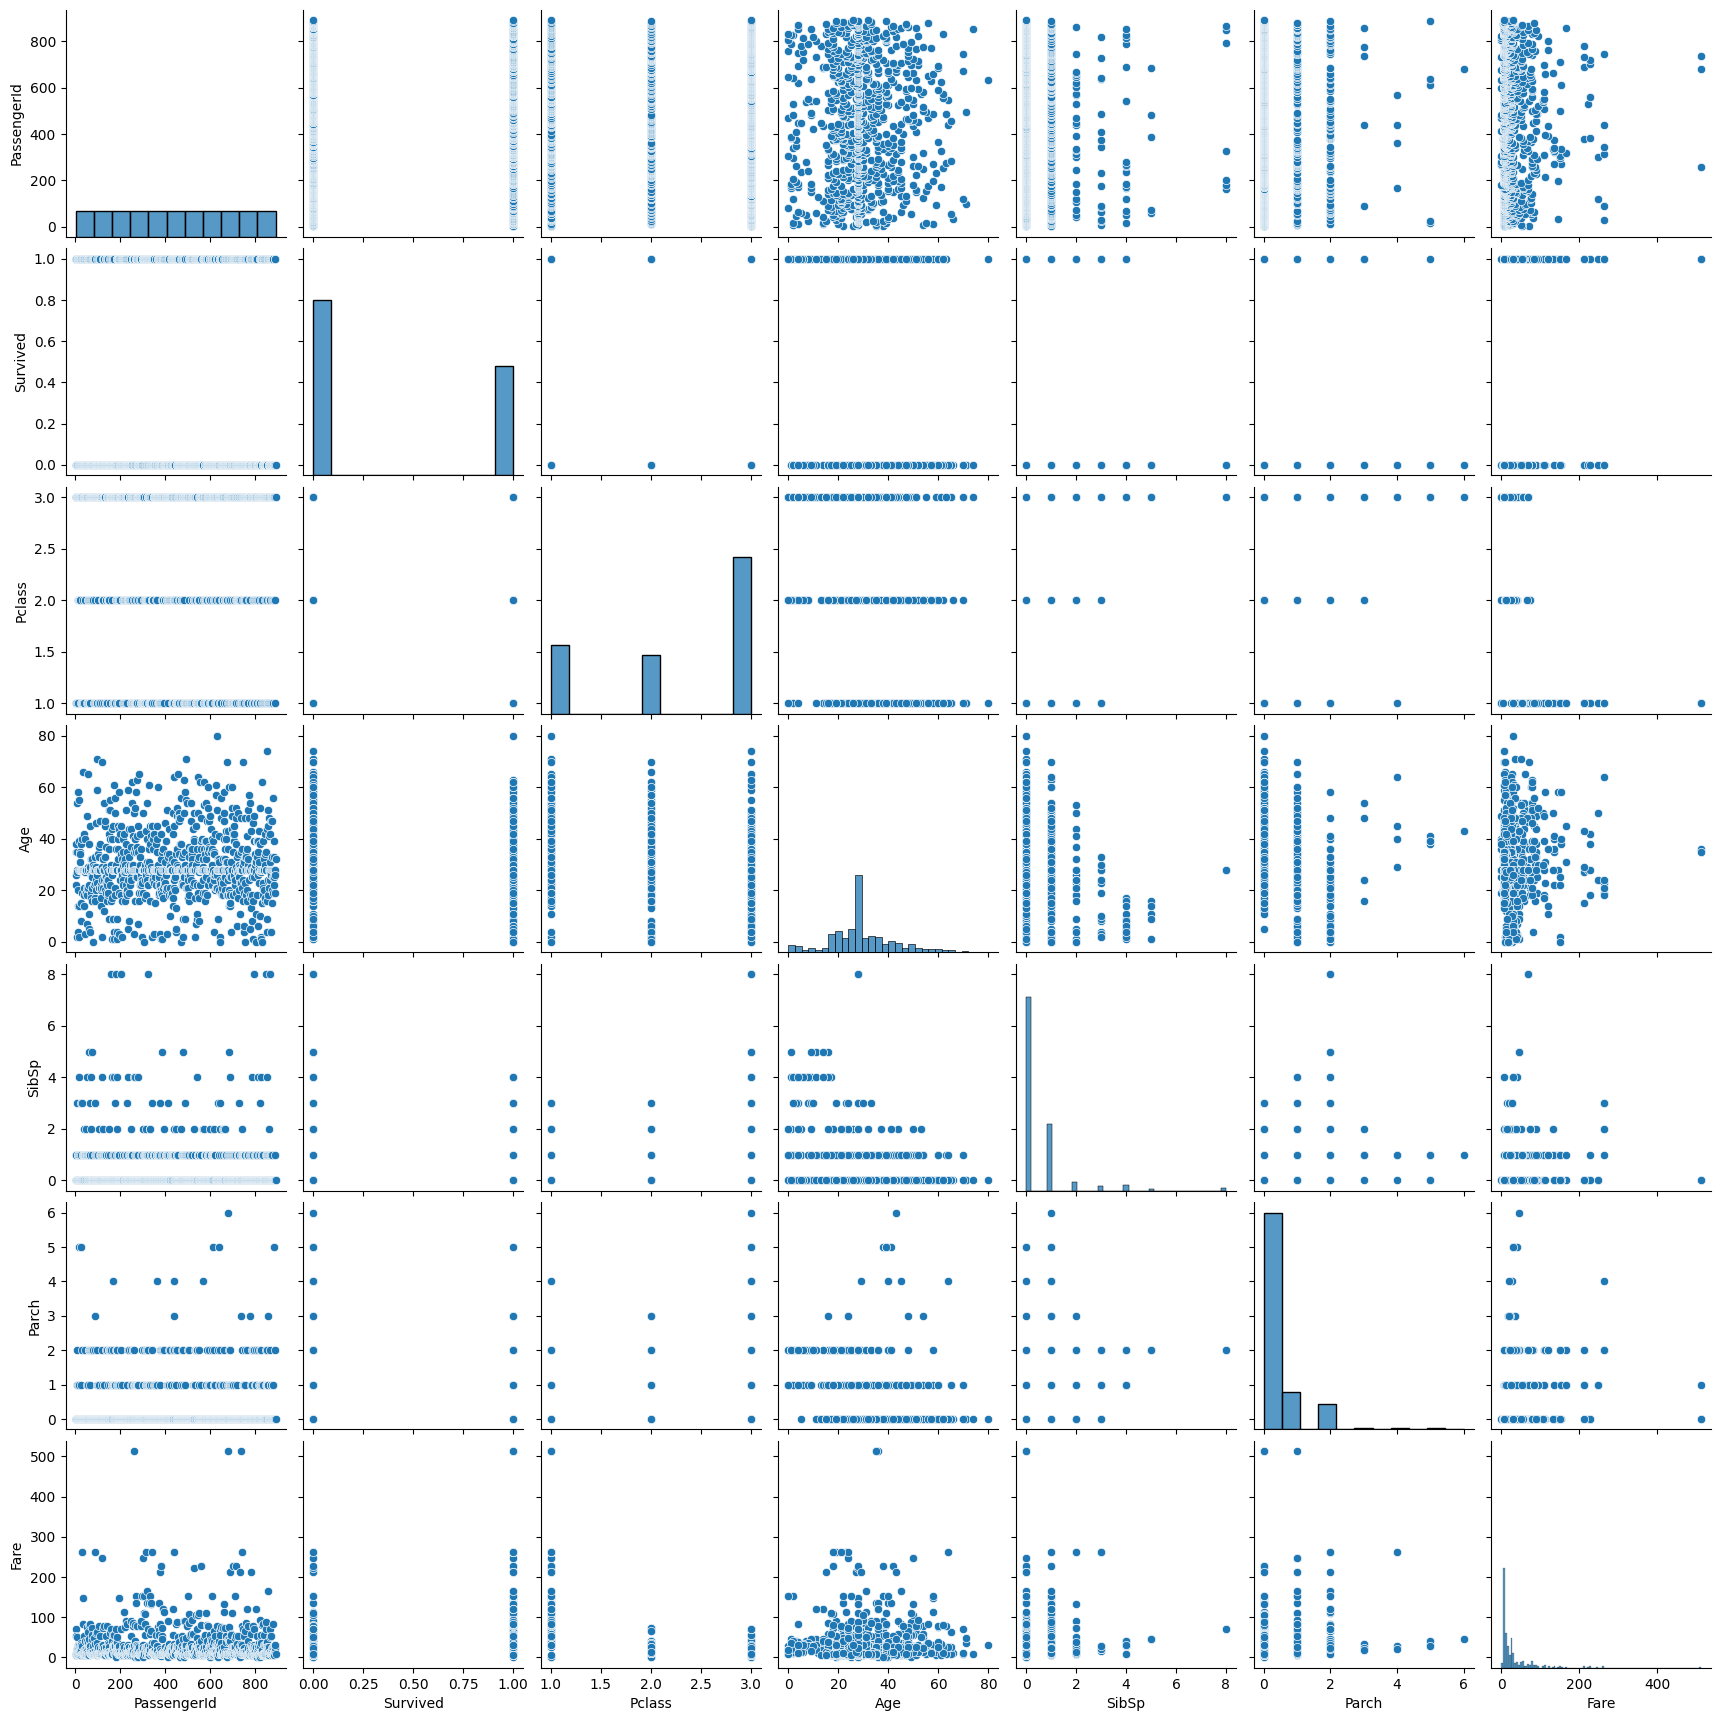

In [54]:
# Ploting a pair plot for the training data
sns.pairplot(trd)
plt.show()

# coorelation

In [72]:
data=trd.select_dtypes('number')
corr=data.corr('pearson')

<Axes: >

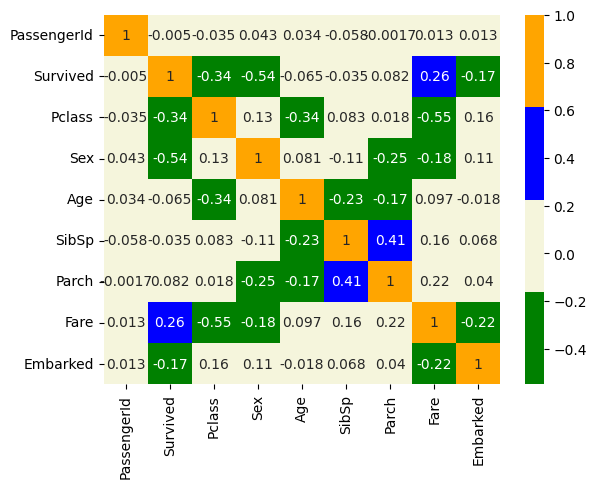

In [81]:
sns.heatmap(corr,annot=True,cmap=["Green","Beige","Blue","orange"])
# help(sns.heatmap)

#### Here Parch and SibSp are moderately coorelated then remeaning all are weakly corelated.

# Transformation

In [56]:
# Applying the Label Encoder to the categorical Columns to the training data
lab=LabelEncoder()
trd["Sex"]=lab.fit_transform(trd["Sex"])
trd["Embarked"]=lab.fit_transform(trd["Embarked"])
trd.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.9250,2
3,4,1,1,0,35,1,0,53.1000,2
4,5,0,3,1,35,0,0,8.0500,2


In [57]:
# applying LabelEncoder to the categorical columns of testing data
tsd['Sex']=lab.fit_transform(tsd["Sex"])
tsd['Embarked']=lab.fit_transform(tsd['Embarked'])

# Spliting the data

In [82]:
trd.to_csv("training_Data2",index=False)
X=trd.drop("Survived",axis=1)
Y=trd["Survived"]

# Feature Scaling

In [59]:
# applying scale function to the X indepedent Variable
std=scale(X)
X=pd.DataFrame(std,columns=X.columns)



In [60]:
# applying scale to the testing data
sat=scale(tsd)
tsd=pd.DataFrame(sat,columns=tsd.columns)
tsd

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.727912,0.873482,0.755929,0.348318,-0.499470,-0.400248,-0.497413,-0.470915
1,-1.719625,0.873482,-1.322876,1.371432,0.616992,-0.400248,-0.512278,0.700767
2,-1.711337,-0.315819,0.755929,2.551948,-0.499470,-0.400248,-0.464100,-0.470915
3,-1.703050,0.873482,0.755929,-0.202589,-0.499470,-0.400248,-0.482475,0.700767
4,-1.694763,0.873482,-1.322876,-0.596095,0.616992,0.619896,-0.417492,0.700767
...,...,...,...,...,...,...,...,...
413,1.694763,0.873482,0.755929,-0.202589,-0.499470,-0.400248,-0.493455,0.700767
414,1.703050,-1.505120,-1.322876,0.741824,-0.499470,-0.400248,1.314435,-1.642598
415,1.711337,0.873482,0.755929,0.663122,-0.499470,-0.400248,-0.507796,0.700767
416,1.719625,0.873482,0.755929,-0.202589,-0.499470,-0.400248,-0.493455,0.700767


# Model Building

In [61]:
# Training the logstic regression model using training data
model=LogisticRegression(max_iter=1000)
model.fit(X,Y)

LogisticRegression(max_iter=1000)

In [62]:
# predicting the target Values for the testdata
model.predict(tsd)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [63]:
# calculating the Target values for training data
x_p=model.predict(X)

In [64]:
# calculating the accuracy
accuracy_score(Y,x_p)

0.8013468013468014

In [65]:
# calculating the Precision
precision_score(Y,x_p)

0.7602523659305994

In [66]:
# calculating the racall
recall_score(Y,x_p)

0.7046783625730995

In [67]:
# calculating the f1score
f1_score(Y,x_p)

0.7314112291350531

In [68]:
confusion_matrix(Y,x_p)

array([[473,  76],
       [101, 241]])

### Here both training and testing data are inappropiate. Because the cabin column is most important but it contains 77% null values.That's why model accuracy is less

# ROC-AOC Curve

In [84]:
pred_prob=model.predict_proba(X)[:,1]
tpr,fpr,thresholds=roc_curve(Y,pred_prob)
AOC=roc_auc_score(Y,pred_prob)
plt.plot(tpr,fpr,label='Log model(area="%0.2f")'%AOC)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.legend()
plt.show()

array([           inf, 1.00000000e+00, 9.99999998e-01, 9.99999998e-01,
       9.99999997e-01, 9.99999996e-01, 9.99999994e-01, 9.99999988e-01,
       9.99999954e-01, 9.99999890e-01, 9.99999602e-01, 9.99999586e-01,
       9.99999497e-01, 9.99999430e-01, 9.99999310e-01, 9.99999231e-01,
       9.99998785e-01, 9.99998758e-01, 9.99998455e-01, 9.99998437e-01,
       9.99996726e-01, 9.99996654e-01, 9.99995143e-01, 9.99987128e-01,
       9.99983755e-01, 9.99983225e-01, 9.99959718e-01, 9.99959535e-01,
       9.99908241e-01, 9.99881415e-01, 9.99862637e-01, 9.99854319e-01,
       9.99791736e-01, 9.99786160e-01, 9.99533976e-01, 9.99273578e-01,
       9.99266730e-01, 9.99229823e-01, 9.99209002e-01, 9.99046491e-01,
       9.98997124e-01, 9.98785932e-01, 9.98665126e-01, 9.98603529e-01,
       9.98588042e-01, 9.98343645e-01, 9.98234440e-01, 9.98108374e-01,
       9.97522815e-01, 9.97468415e-01, 9.97264003e-01, 9.96522357e-01,
       9.96053024e-01, 9.94642176e-01, 9.94422830e-01, 9.94270891e-01,
      

# Interpretation

In [70]:
# coefficients of the model
coef=model.coef_
Data={"Features":X.columns,
      "Coefficients":coef[0]}

In [71]:
pd.DataFrame(Data)

,Features,Coefficients
0,PassengerId,0.023444
1,Pclass,-0.890681
2,Sex,-1.295753
3,Age,-0.495883
4,SibSp,-0.350653
5,Parch,-0.078056
6,Fare,0.103498
7,Embarked,-0.169097


### Here PassangerID(0.023),Sex(magnitude(|-1.29|) and Fare(0.10) are more important .Beacuse it push the predicted Probability towards Survived(target Variable).

# Interview Questions:

# Difference between Precision and Recall.

#### Precision is a postive rate that are Postively predicted by model.
#### it is a ratio of True postive and postive values that are predicted by model.
#### precision = TP/TP+FP
#### Recall is a True postive rate that are actual postive values in the data set.it is also called as sensitivity.
### It is the ratio of True Postive and actual Postive Values.
#### Recall=TP/TP+FN
#### it shows how much percentage model predict the Postive values.


# Cross Validation

#### Cross Validation is a technique that is used to split the dataset into training and testing dataset.
#### it has two methods:
#### 1. K-Fold cross validtion
####  In the K-Fold cross validation the dataset is divided into provided number of splits and among the spits
#### one split consider as train dataset.it contains until the every dataset is consider as train data.
#### 2.Leave-one-out-cross Validation:
#### In these technique each data point is consider as test data and remaining data points as training data points.it continues until each data point act as test data point.
#### Cross validation is more important in the binary classification. it reduce the variance and don't depend on single training and testing data.